In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Загрузим данные о номинальной заработной плате по отраслям экономики

In [364]:
df_1 = pd.read_excel('tab3-zpl_2023.xlsx', 
                     sheet_name=0, 
                     skiprows=5, 
                     names=['name', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
                     skipfooter=3,
                    index_col=0)

In [365]:
df_1 = df_1 \
    .dropna() \
    .rename(index={'деятельность гостиниц и предприятий общественного питания': 'гостиницы и рестораны'})

In [366]:
df_1.index = df_1.index.str.strip()

Оставим для анализа данные о заработной плате в следующих отраслях:
- гостиницы и рестораны
- добыча полезных ископаемых
- образование

In [367]:
df_1_main = df_1.loc[['гостиницы и рестораны', 'добыча полезных ископаемых', 'образование']]

In [368]:
df_2 = pd.read_excel('tab3-zpl_2023.xlsx', 
                     sheet_name=1, 
                     skiprows=2, 
                     header=0,
                     skipfooter=2,
                    index_col=0)

In [369]:
df_2 = df_2.rename(columns={'Unnamed: 0': 'name'},
                  index={'Добыча полезных ископаемых': 'добыча полезных ископаемых',
                         'Гостиницы и рестораны': 'гостиницы и рестораны',
                         'Образование': 'образование'}) \
            .dropna()

In [370]:
df_2_main = df_2.loc[['добыча полезных ископаемых', 'гостиницы и рестораны', 'образование']]

In [371]:
df_main = df_2_main.merge(df_1_main, left_index=True, right_index=True)

In [372]:
df_main = df_main.T

In [373]:
df_main.index = df_main.index.astype(int)

<Axes: >

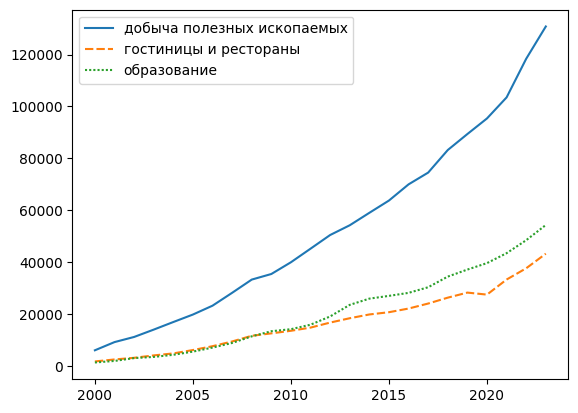

In [374]:
sns.lineplot(df_main)

In [375]:
df_main.describe()

,добыча полезных ископаемых,гостиницы и рестораны,образование
count,24.000000,24.000000,24.00000
mean,53067.995833,17000.362500,20829.77500
std,36175.305078,11589.331922,15930.73969
min,5940.200000,1640.000000,1240.20000
25%,22290.625000,7149.625000,6594.90000
50%,47766.300000,15661.800000,17402.20000
75%,76650.075000,24538.125000,31283.45000
max,130825.600000,43191.800000,54262.70000


<Axes: >

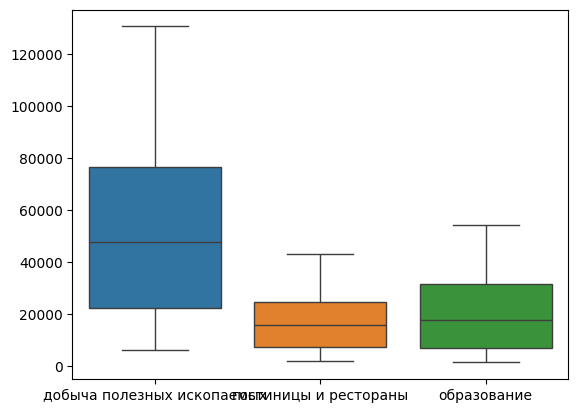

In [376]:
sns.boxplot(df_main)

Загрузим данные о инфляции по годам

In [377]:
import requests
import pandas as pd
from urllib.parse import urlparse, urlunparse, quote

def encode_punycode(url):
    # Разбиваем URL на компоненты
    parsed_url = urlparse(url)
    # Кодируем доменное имя в Punycode
    encoded_domain = parsed_url.hostname.encode('idna').decode('ascii')
    # Кодируем путь для безопасной передачи через URL
    encoded_path = quote(parsed_url.path)
    # Возвращаем перекодированный URL
    return urlunparse(parsed_url._replace(netloc=encoded_domain, path=encoded_path))

# Исходный URL
url = 'https://уровень-инфляции.рф/таблицы-инфляции'

# Кодирование доменного имени и пути в Punycode/URL-код
encoded_url = encode_punycode(url)
print("Encoded URL:", encoded_url)

# Загрузка всех таблиц со страницы
try:
    tables = pd.read_html(encoded_url)
    print(f"Найдено таблиц: {len(tables)}")
    if tables:
        df_inf = tables[0]
        # print(tables[0])
        # Опционально: сохранение таблиц в CSV
        for i, table in enumerate(tables):
            table.to_csv(f'table_{i+1}.csv', index=False)
        print("Таблицы сохранены в файлы CSV.")
    else:
        print("На странице не найдены таблицы.")
except Exception as e:
    print("Произошла ошибка при загрузке таблиц:", e)


Encoded URL: https://xn----ctbjnaatncev9av3a8f8b.xn--p1ai/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8
Найдено таблиц: 2
Таблицы сохранены в файлы CSV.


In [378]:
# import requests
# import pandas as pd
# from urllib.parse import urlparse, urlunparse, quote
# from requests.packages.urllib3.exceptions import InsecureRequestWarning
# from requests.packages.urllib3 import disable_warnings

# def encode_punycode(url):
#     # Разбиваем URL на компоненты
#     parsed_url = urlparse(url)
#     # Кодируем доменное имя в Punycode
#     encoded_domain = parsed_url.hostname.encode('idna').decode('ascii')
#     # Кодируем путь для безопасной передачи через URL
#     encoded_path = quote(parsed_url.path)
#     # Возвращаем перекодированный URL
#     return urlunparse(parsed_url._replace(netloc=encoded_domain, path=encoded_path))

# # Отключаем предупреждения SSL
# disable_warnings(InsecureRequestWarning)

# # Исходный URL
# url = 'https://уровень-инфляции.рф/таблицы-инфляции'

# # Кодирование доменного имени и пути в Punycode/URL-код
# encoded_url = encode_punycode(url)
# print("Encoded URL:", encoded_url)

# # Пытаемся загрузить данные, игнорируя проверку SSL
# try:
#     response = requests.get(encoded_url, verify=False)
#     tables = pd.read_html(response.text)  # Используем text ответа для pandas
#     print(f"Найдено таблиц: {len(tables)}")
#     if tables:
#         # Опционально: сохранение таблиц в CSV
#         for i, table in enumerate(tables):
#             table.to_csv(f'table_{i+1}.csv', index=False)
#         print("Таблицы сохранены в файлы CSV.")
#     else:
#         print("На странице не найдены таблицы.")
# except Exception as e:
#     print("Произошла ошибка при загрузке таблиц:", e)

In [379]:
df_inf = df_inf.set_index('Год') \
    .rename(columns={'Всего': 'inf_rate'})

In [380]:
df_inf = df_inf['inf_rate']

In [381]:
df_inf = df_inf.sort_index(ascending=True)

Добавим данные о инфляции в основную таблицу

In [382]:
df_main = df_main.merge(df_inf, how='left', left_index=True, right_index=True)

In [383]:
df_main.head()

,добыча полезных ископаемых,гостиницы и рестораны,образование,inf_rate
2000,5940.2,1640.0,1240.2,20.20
2001,9099.2,2403.6,1833.0,18.58
2002,11080.9,3039.3,2927.3,15.06
2003,13912.4,3966.7,3386.6,11.99
2004,16841.7,4737.3,4203.4,11.74


Рассчитаем реальную заработную плату по отраслям

In [384]:
df_main = df_main.assign(real_добыча_полезных_ископаемых = df_main[['добыча полезных ископаемых']].apply(lambda x: x / (1 + df_main['inf_rate'] / 100)).round(2), 
        real_гостиницы_и_рестораны = df_main[['гостиницы и рестораны']].apply(lambda x: x / (1 + df_main['inf_rate'] / 100)).round(2), 
        real_образование = df_main[['образование']].apply(lambda x: x / (1 + df_main['inf_rate'] / 100)).round(2))

In [385]:
df_main

,добыча полезных ископаемых,гостиницы и рестораны,образование,inf_rate,real_добыча_полезных_ископаемых,real_гостиницы_и_рестораны,real_образование
2000,5940.2,1640.0,1240.2,20.20,4941.93,1364.39,1031.78
2001,9099.2,2403.6,1833.0,18.58,7673.47,2026.99,1545.79
2002,11080.9,3039.3,2927.3,15.06,9630.54,2641.49,2544.15
2003,13912.4,3966.7,3386.6,11.99,12422.89,3542.01,3024.02
2004,16841.7,4737.3,4203.4,11.74,15072.22,4239.57,3761.77
2005,19726.9,6033.4,5429.7,10.91,17786.40,5439.91,4895.59
2006,23145.2,7521.7,6983.3,9.00,21234.13,6900.64,6406.70
2007,28107.5,9339.0,8778.3,11.87,25125.15,8348.08,7846.88
2008,33206.1,11536.2,11316.8,13.28,29313.29,10183.79,9990.11
2009,35363.4,12469.6,13293.6,8.80,32503.12,11461.03,12218.38


Построим графики номинальной и реальной заработной платы по отраслям

Text(0.5, 0.98, 'Динамика номинальной и реальной заработной платы по отраслям')

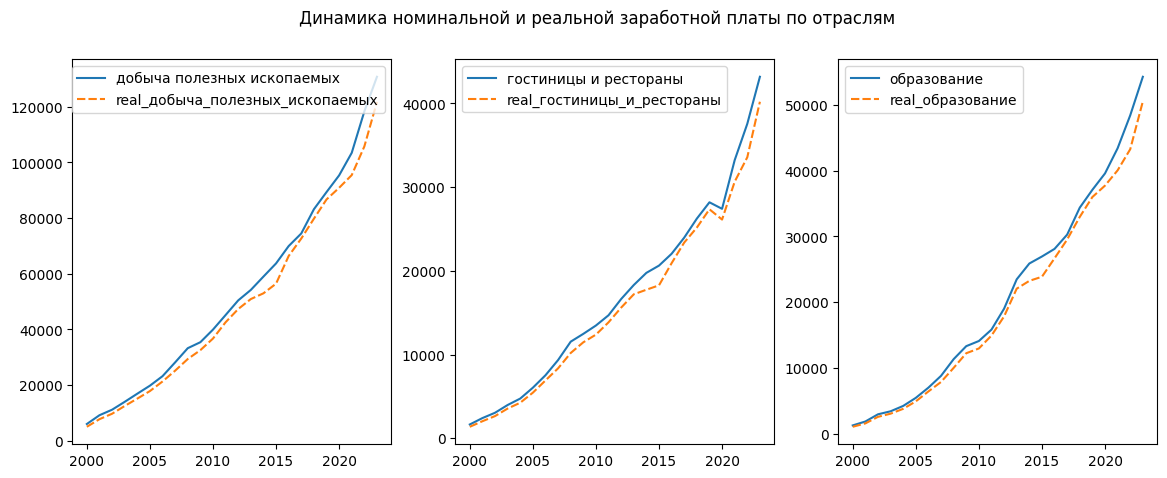

In [386]:
plt.figure(figsize=(14, 5))
plt.subplot(131)
sns.lineplot(data = df_main[['добыча полезных ископаемых', 'real_добыча_полезных_ископаемых']])
plt.subplot(132)
sns.lineplot(data = df_main[['гостиницы и рестораны', 'real_гостиницы_и_рестораны']])
plt.subplot(133)
sns.lineplot(data = df_main[['образование', 'real_образование']])
plt.suptitle('Динамика номинальной и реальной заработной платы по отраслям')

Посчитаем темп роста в % год к году

In [387]:
df_growth = df_main.pct_change().mul(100).round(2).reset_index()

In [388]:
df_growth

,index,добыча полезных ископаемых,гостиницы и рестораны,образование,inf_rate,real_добыча_полезных_ископаемых,real_гостиницы_и_рестораны,real_образование
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,53.18,46.56,47.80,-8.02,55.27,48.56,49.82
2,2002,21.78,26.45,59.70,-18.95,25.50,30.32,64.59
3,2003,25.55,30.51,15.69,-20.39,28.99,34.09,18.86
4,2004,21.06,19.43,24.12,-2.09,21.33,19.69,24.40
5,2005,17.13,27.36,29.17,-7.07,18.01,28.31,30.14
6,2006,17.33,24.67,28.61,-17.51,19.38,26.85,30.87
7,2007,21.44,24.16,25.70,31.89,18.32,20.98,22.48
8,2008,18.14,23.53,28.92,11.88,16.67,21.99,27.31
9,2009,6.50,8.09,17.47,-33.73,10.88,12.54,22.30
